##### Import libraries

In [1]:
from bs4 import BeautifulSoup
import urllib, urllib3
import time
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
import seaborn as sns

##### Specify URL

In [2]:
quote_page = 'https://www.timeout.com/newyork/restaurants/100-best-new-york-restaurants'

In [3]:
quote_page

'https://www.timeout.com/newyork/restaurants/100-best-new-york-restaurants'

##### Query the website and return the html to the variable ‘page’

In [4]:
page = urllib.request.urlopen(quote_page)

In [5]:
page

##### Parse the html using beautiful soup

In [6]:
soup = BeautifulSoup(page, 'html.parser')

In [7]:
soup

<!DOCTYPE html>

<html class="nojs " lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>100 Best Restaurants in NYC You Must Try in 2019</title>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<script type="text/javascript">
window.NREUM||(NREUM={}),__nr_require=function(e,n,t){function r(t){if(!n[t]){var o=n[t]={exports:{}};e[t][0].call(o.exports,function(n){var o=e[t][1][n];return r(o||n)},o,o.exports)}return n[t].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<t.length;o++)r(t[o]);return r}({1:[function(e,n,t){function r(){}function o(e,n,t){return function(){return i(e,[c.now()].concat(u(arguments)),n?null:this,t),n?void 0:this}}var i=e("handle"),a=e(2),u=e(3),f=e("ee").get("tracer"),c=e("loader"),s=NREUM;"undefined"==typeof window.newrelic&&(newrelic=s);var p=["setPageViewName","setCustomAttribute","setErrorHandler","finished","addToTrace","inlineHit","addRelease"],d="api-",l=d+

In [8]:
name_box = soup.find('h3', attrs={'class': 'card-title xs-text-charcoal FranklinGothic xs-text-2 xs-line-height-2 xs-mb3'})

In [9]:
name_box.text.strip()

'Atla'

##### Extracting names of the restaurants

In [10]:
data_restaurant = [i.text.strip() for i in soup.find_all('h3', attrs={'class': 'card-title xs-text-charcoal FranklinGothic xs-text-2 xs-line-height-2 xs-mb3'})]

In [11]:
data_restaurant = data_restaurant[:100]

#####  Extracting details

In [12]:
data_about_restaurant = [i.text for i in soup.find_all('p')]

In [13]:
data_about_restaurant = data_about_restaurant[6:204]

In [14]:
data_about_restaurant[154] = 'What is it?' + data_about_restaurant[154]

In [15]:
data_about_restaurant[139] = 'What is it?' + data_about_restaurant[139]

In [16]:
data_about_restaurant[45] = 'What is it?' + data_about_restaurant[45]

In [17]:
about = []
for i in data_about_restaurant:
    if 'What is it?' in i:
        temp = i
        about.append(i.replace('What is it?', ''))

In [18]:
about

[' It takes a lot to knock Eleven Madison Park off the #1 spot for New York’s best dining, but we’re confident to stand behind this all-day spin-off of Enrique Olvera and Daniela Soto-Innes’ Cosme. \xa0The more casual, cooler follow-up from their Flatiron megahit spotlights healthy Mexican and Central American fare: chayote squash salad, flax seeds chilaquiles and striped bass aguachile. There’s also a strong emphasis on drinks; diners can begin the day with café con leche and end with agave-leaning cocktails by beverage director Yana Volfson. Taking cues from the community-focused restaurants of Mexico City, the 60-seat venue features sleek black and oakwood furniture, a white terrazzo bar and verdant vegetation lining the walls.',
 '\xa0In the #trending millennial slang lexicon, basic is not a compliment—it’s a dig to the banal, extra-regular-ness of everything from fur-lined Ugg boots to pumpkin-spice lattes. Basic cooking is no exception, redolent with whiffs of home kitchens and h

In [19]:
data_type = [i.text.strip() for i in soup.find_all('div', attrs={'class': 'category things-to-do bold xs-text-8 theme-text xs-mb1 xs-inline-block'})]

In [20]:
data_type = data_type[:100]

In [21]:
data_location = [i.text.strip() for i in soup.find_all('span', attrs={'class': 'bold sm-text-8 xs-text-9 xs-line-height-10 xs-inline-block xs-mr1'})]

In [22]:
for i in range(len(data_type)):
    type = data_type[i].split(',')[1]
    data_type[i] = type

In [23]:
data_type

[' Mexican',
 ' Italian',
 ' Contemporary American',
 ' Korean',
 ' French',
 ' French',
 ' American creative',
 ' Japanese',
 ' Contemporary American',
 ' Contemporary American',
 ' Italian',
 ' Mexican',
 ' Contemporary American',
 ' American',
 ' American creative',
 ' Hamburgers',
 ' French',
 ' French',
 ' Italian',
 ' Pizza',
 ' French',
 ' Japanese',
 ' Italian',
 ' Seafood',
 ' Mediterranean',
 ' Mediterranean',
 ' Persian',
 ' French',
 ' French',
 ' Italian',
 ' Italian',
 ' Italian',
 ' Israeli',
 ' American',
 ' Pizza',
 ' Specialist food and drink',
 ' Japanese',
 ' Contemporary European',
 ' Steakhouse',
 ' American',
 ' Mediterranean',
 ' Pizza',
 ' Contemporary American',
 ' Korean',
 ' Mexican',
 ' Italian',
 ' Pizza',
 ' French',
 ' Contemporary American',
 ' French',
 ' Pan-Asian',
 ' Vegetarian',
 ' Indian',
 ' Vegetarian',
 ' Thai',
 ' American creative',
 ' French',
 ' Delis',
 ' Mexican',
 ' Japanese',
 ' Italian',
 ' Thai',
 ' Korean',
 ' Contemporary American',

In [24]:
df = pd.DataFrame(data = {'Name': data_restaurant, 'About':about, 
                         'Cuisine': data_type, 'Location': data_location})

In [25]:
df.head()

,About,Cuisine,Location,Name
0,It takes a lot to knock Eleven Madison Park o...,Mexican,East Village,Atla
1,"In the #trending millennial slang lexicon, ba...",Italian,West Village,Via Carota
2,The spot sports a fashionably cookie-cutter d...,Contemporary American,Nolita,Estela
3,The front door of this fine-dining Korean res...,Korean,Midtown,Atomix
4,It’s a scene out of Ratatouille: Lined with c...,French,Soho,Le Coucou


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
About       100 non-null object
Cuisine     100 non-null object
Location    100 non-null object
Name        100 non-null object
dtypes: object(4)
memory usage: 3.2+ KB


In [27]:
df['Cuisine'].nunique()

33

In [28]:
df['Location'].nunique()

37

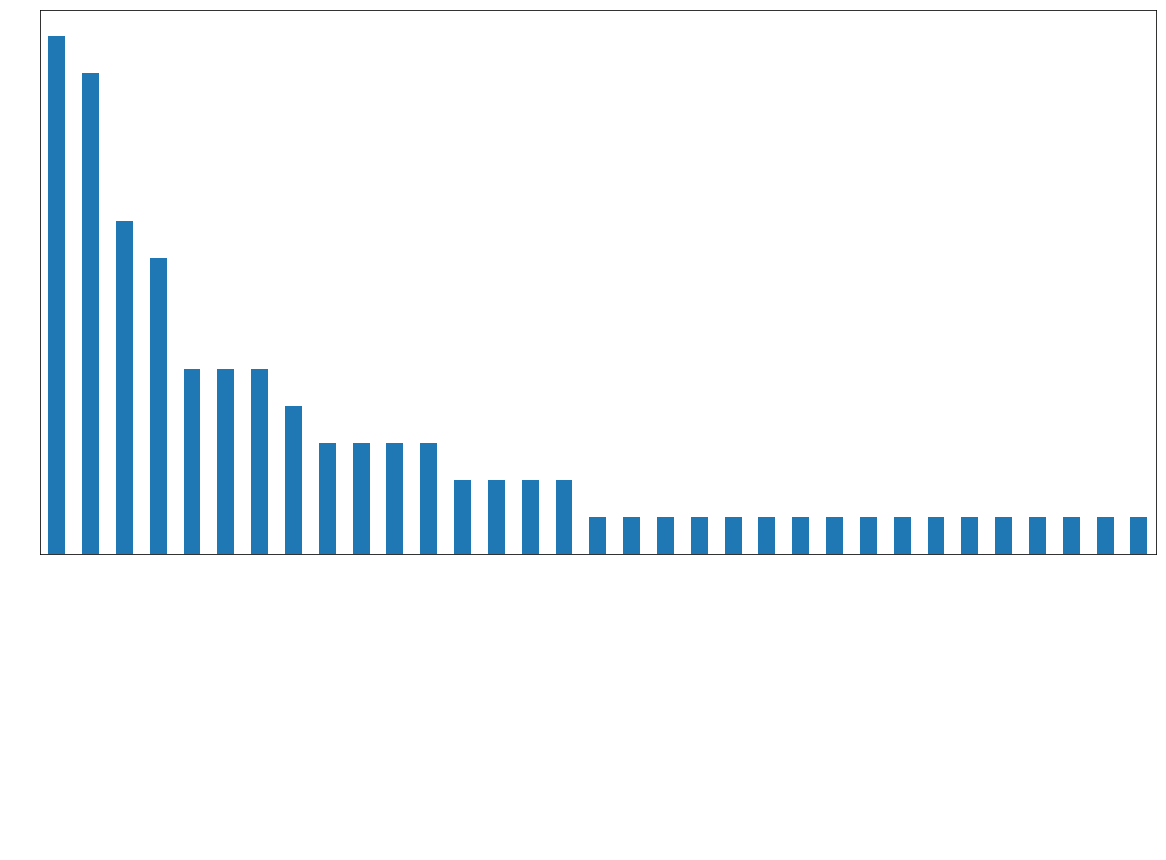

In [29]:
cuisine_counter = df['Cuisine'].value_counts()
mpl.rcParams['xtick.color'] = 'White'
mpl.rcParams['ytick.color'] = 'White'
cuisine_counter.plot(kind='bar' , figsize=(20,10), fontsize = 20);

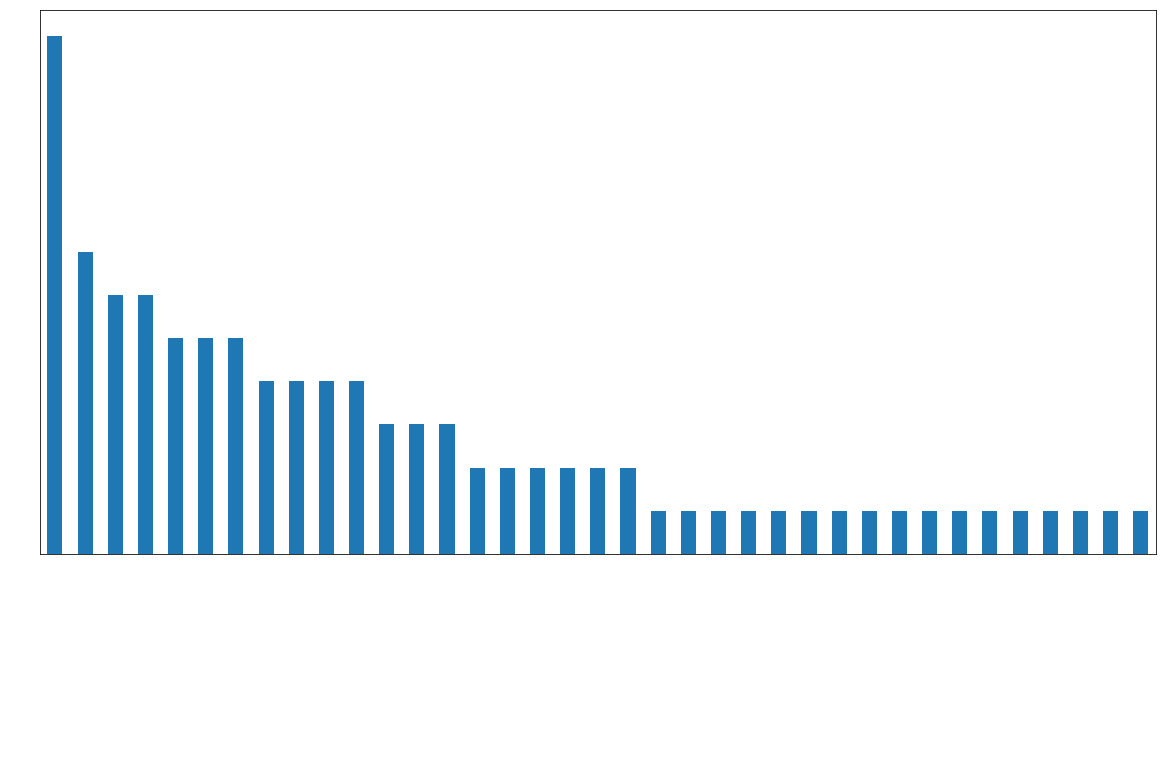

In [30]:
location_counter = df['Location'].value_counts()
mpl.rcParams['xtick.color'] = 'White'
mpl.rcParams['ytick.color'] = 'White'
location_counter.plot(kind='bar' , figsize=(20,10), fontsize = 20);

In [31]:
from nltk.corpus import stopwords
import re
import nltk
# nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

corpus = []
for i in range(df.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', df['About'][i])
    review = review.lower()
    review = review.split()
    lemma = WordNetLemmatizer()
    '''set is used to run the algorithm faster when using book or article database'''
    review = [lemma.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [32]:
for i in range(df.shape[0]):
    corpus[i] = df['Cuisine'][i].lower().strip() + ' ' + df['Location'][i].lower().strip() + ' ' + corpus[i] 

In [33]:
corpus

['mexican east village take lot knock eleven madison park spot new york best dining confident stand behind day spin enrique olvera daniela soto innes cosme casual cooler follow flatiron megahit spotlight healthy mexican central american fare chayote squash salad flax seed chilaquiles striped bass aguachile also strong emphasis drink diner begin day caf con leche end agave leaning cocktail beverage director yana volfson taking cue community focused restaurant mexico city seat venue feature sleek black oakwood furniture white terrazzo bar verdant vegetation lining wall',
 'italian west village trending millennial slang lexicon basic compliment dig banal extra regular ness everything fur lined ugg boot pumpkin spice latte basic cooking exception redolent whiff home kitchen hand saut class soulful italian plate served via carota first joint effort chef power couple jody williams rita sodi rustic sophisticated heart swelling prof simple food anything basic',
 'contemporary american nolita s

In [34]:
data = df[:]

In [35]:
data

,About,Cuisine,Location,Name
0,It takes a lot to knock Eleven Madison Park o...,Mexican,East Village,Atla
1,"In the #trending millennial slang lexicon, ba...",Italian,West Village,Via Carota
2,The spot sports a fashionably cookie-cutter d...,Contemporary American,Nolita,Estela
3,The front door of this fine-dining Korean res...,Korean,Midtown,Atomix
4,It’s a scene out of Ratatouille: Lined with c...,French,Soho,Le Coucou
5,Siblings Gilbert and Maguy Le Coze brought Le...,French,Midtown West,Le Bernardin
6,Don’t call it a comeback. After attaining bes...,American creative,Gramercy & Flatiron,Eleven Madison Park
7,When world-renowned sushi chef Masa Takayama ...,Japanese,Upper West Side,Masa
8,They call it second-child syndrome: a looseni...,Contemporary American,Lower East Side,Wildair
9,"Expectations are high at Per Se, and that goe...",Contemporary American,Upper West Side,Per Se


In [36]:
data['Relevant'] = corpus
data.set_index('Name', inplace = True)
data.head()

/Users/Yatharth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,About,Cuisine,Location,Relevant
Name,,,,
Atla,It takes a lot to knock Eleven Madison Park o...,Mexican,East Village,mexican east village take lot knock eleven mad...
Via Carota,"In the #trending millennial slang lexicon, ba...",Italian,West Village,italian west village trending millennial slang...
Estela,The spot sports a fashionably cookie-cutter d...,Contemporary American,Nolita,contemporary american nolita spot sport fashio...
Atomix,The front door of this fine-dining Korean res...,Korean,Midtown,korean midtown front door fine dining korean r...
Le Coucou,It’s a scene out of Ratatouille: Lined with c...,French,Soho,french soho scene ratatouille lined copper pot...


In [37]:
data.drop([col for col in data.columns if col!= 'Relevant'], inplace = True, axis = 1)

/Users/Yatharth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
data.head()

,Relevant
Name,
Atla,mexican east village take lot knock eleven mad...
Via Carota,italian west village trending millennial slang...
Estela,contemporary american nolita spot sport fashio...
Atomix,korean midtown front door fine dining korean r...
Le Coucou,french soho scene ratatouille lined copper pot...


In [39]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()
count_matrix = count.fit_transform(data['Relevant'])

indices = pd.Series(data.index)
indices[:5]

0          Atla
1    Via Carota
2        Estela
3        Atomix
4     Le Coucou
Name: Name, dtype: object

In [40]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.01322215, 0.07312724, ..., 0.12820565, 0.01464269,
        0.10375717],
       [0.01322215, 1.        , 0.04254356, ..., 0.03314968, 0.01703748,
        0.02012109],
       [0.07312724, 0.04254356, 1.        , ..., 0.04583492, 0.02355714,
        0.08346223],
       ...,
       [0.12820565, 0.03314968, 0.04583492, ..., 1.        , 0.11013346,
        0.086711  ],
       [0.01464269, 0.01703748, 0.02355714, ..., 0.11013346, 1.        ,
        0.02228283],
       [0.10375717, 0.02012109, 0.08346223, ..., 0.086711  , 0.02228283,
        1.        ]])

In [41]:
def recommendations(name, cosine_sim = cosine_sim):
    
    recommended_res = []
    o_pick = []
    idx = indices[indices == name].index[0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_5_indexes = list(score_series.iloc[1:6].index)
    for i in top_5_indexes:
        recommended_res.append(str(list(data.index)[i]))

    return recommended_res

In [45]:
recommendations('Atla')

['Cosme', 'Hearth', 'Casa Enrique', 'Made Nice', 'B&H Dairy']

In [44]:
data

,Relevant
Name,
Atla,mexican east village take lot knock eleven mad...
Via Carota,italian west village trending millennial slang...
Estela,contemporary american nolita spot sport fashio...
Atomix,korean midtown front door fine dining korean r...
Le Coucou,french soho scene ratatouille lined copper pot...
Le Bernardin,french midtown west sibling gilbert maguy le c...
Eleven Madison Park,american creative gramercy & flatiron call com...
Masa,japanese upper west side world renowned sushi ...
Wildair,contemporary american lower east side call sec...
